In [1]:
import pandas as pd
import numpy as np
import itertools
from itertools import chain, combinations
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
from statsmodels.graphics.regressionplots import *
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.model_selection import train_test_split
import math



In [2]:
crime = pd.read_csv('crime.csv')   

In [3]:
crime.head()

,sid,state,crime,murder,pctmetro,pctwhite,pcths,poverty,single
0,1,ak,761,9.0,41.8,75.2,86.6,9.1,14.3
1,2,al,780,11.6,67.4,73.5,66.9,17.4,11.5
2,3,ar,593,10.2,44.7,82.9,66.3,20.0,10.7
3,4,az,715,8.6,84.7,88.6,78.7,15.4,12.1
4,5,ca,1078,13.1,96.7,79.3,76.2,18.2,12.5


In [4]:
crime.corr()

,sid,crime,murder,pctmetro,pctwhite,pcths,poverty,single
sid,1.000000,-0.024159,0.147281,-0.059470,0.090776,-0.023529,0.121086,0.054030
crime,-0.024159,1.000000,0.886196,0.544039,-0.677176,-0.256052,0.509508,0.838875
murder,0.147281,0.886196,1.000000,0.316114,-0.706193,-0.286071,0.565871,0.858911
pctmetro,-0.059470,0.544039,0.316114,1.000000,-0.337221,-0.003977,-0.060538,0.259810
pctwhite,0.090776,-0.677176,-0.706193,-0.337221,1.000000,0.338548,-0.389294,-0.656437
pcths,-0.023529,-0.256052,-0.286071,-0.003977,0.338548,1.000000,-0.743938,-0.219783
poverty,0.121086,0.509508,0.565871,-0.060538,-0.389294,-0.743938,1.000000,0.548589
single,0.054030,0.838875,0.858911,0.259810,-0.656437,-0.219783,0.548589,1.000000


In [5]:
crime.describe()

,sid,crime,murder,pctmetro,pctwhite,pcths,poverty,single
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,26.000000,612.843137,8.727451,67.390196,84.115686,76.223529,14.258824,11.325490
std,14.866069,441.100323,10.717576,21.957133,13.258392,5.592087,4.584242,2.121494
min,1.000000,82.000000,1.600000,24.000000,31.800000,64.300000,8.000000,8.400000
25%,13.500000,326.500000,3.900000,49.550000,79.350000,73.500000,10.700000,10.050000
50%,26.000000,515.000000,6.800000,69.800000,87.600000,76.700000,13.100000,10.900000
75%,38.500000,773.000000,10.350000,83.950000,92.600000,80.100000,17.400000,12.050000
max,51.000000,2922.000000,78.500000,100.000000,98.500000,86.600000,26.400000,22.100000


### 2.2 Tests for Normality of Residuals

One of the assumptions of linear regression analysis is that the residuals are normally distributed. This assumption assures that the p-values for the t-tests will be valid. As before, we will generate the residuals (called r) and predicted values (called fv) and put them in a dataset (called elem1res)

In [18]:
lm = smf.ols(formula = "crime ~ pctmetro + poverty + single + pctwhite + murder ", data = crime).fit()
print lm.summary()

                            OLS Regression Results                            
Dep. Variable:                  crime   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     75.73
Date:                Fri, 03 May 2019   Prob (F-statistic):           9.11e-21
Time:                        09:58:11   Log-Likelihood:                -325.24
No. Observations:                  51   AIC:                             662.5
Df Residuals:                      45   BIC:                             674.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -800.7746    335.291     -2.388      0.0

In [19]:
lm1 = smf.ols(formula = "crime ~ pctmetro + poverty + single + pctwhite  ", data = crime).fit()
print lm1.summary()

                            OLS Regression Results                            
Dep. Variable:                  crime   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     63.07
Date:                Fri, 03 May 2019   Prob (F-statistic):           4.35e-18
Time:                        09:58:17   Log-Likelihood:                -334.74
No. Observations:                  51   AIC:                             679.5
Df Residuals:                      46   BIC:                             689.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1191.6892    386.009     -3.087      0.0

In [23]:
crime1res = pd.concat([crime, pd.Series(lm1.resid, name = 'resid'), pd.Series(lm1.predict(), name = "predict")], axis = 1)

In [24]:
crime1res.head()

,sid,state,crime,murder,pctmetro,pctwhite,pcths,poverty,single,resid,predict
0,1,ak,761,9.0,41.8,75.2,86.6,9.1,14.3,34.312062,726.687938
1,2,al,780,11.6,67.4,73.5,66.9,17.4,11.5,56.480152,723.519848
2,3,ar,593,10.2,44.7,82.9,66.3,20.0,10.7,123.493861,469.506139
3,4,az,715,8.6,84.7,88.6,78.7,15.4,12.1,-122.506800,837.506800
4,5,ca,1078,13.1,96.7,79.3,76.2,18.2,12.5,24.203443,1053.796557


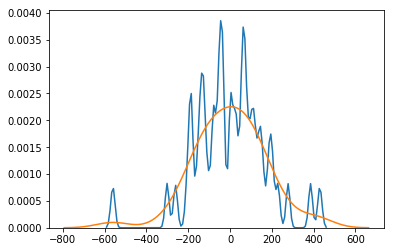

In [25]:
sns.kdeplot(np.array(crime1res.resid), bw=10)
sns.distplot(np.array(crime1res.resid), hist=False)

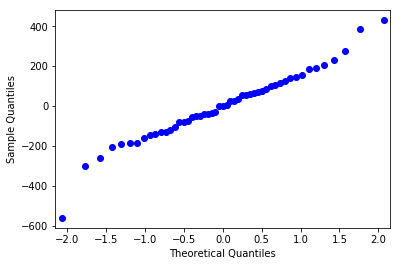

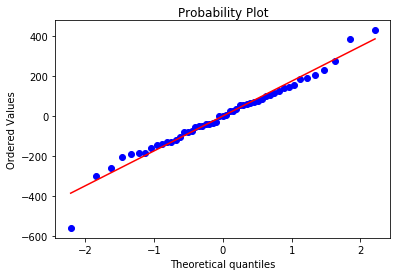

In [26]:
sm.qqplot(crime1res.resid)
plt.show()

import pylab
scipystats.probplot(crime1res.resid, dist="norm", plot=pylab)
pylab.show()

In [27]:
'''
by default, scipy stats.kstest for normal will assume mean 0 and stdev 1. To use this, the data should be normalized first
'''
resid = crime1res.resid
norm_resid = (crime1res.resid - np.mean(crime1res.resid)) / np.std(crime1res.resid)
print scipystats.kstest(norm_resid, 'norm')

# or use the statsmodels provided function kstest_normal to use kolmogorov-smirnov test or Anderson-Darling test
print stats.diagnostic.kstest_normal(crime1res.resid, pvalmethod='approx')
print stats.diagnostic.normal_ad(crime1res.resid)

KstestResult(statistic=0.05835177501000273, pvalue=0.9950589369070272)
(0.06067256523868049, 0.2)
(0.26756824330223594, 0.6719700207825735)


C:\Users\Bota\Miniconda3\lib\site-packages\statsmodels\stats\_adnorm.py:66: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  S = np.sum((2*i[sl1]-1.0)/N*(np.log(z)+np.log(1-z[sl2])), axis=axis)


Severe outliers consist of those points that are either 3 inter-quartile-ranges below the first quartile or 3 inter-quartile-ranges above the third quartile. The presence of any severe outliers should be sufficient evidence to reject normality at a 5% significance level. Mild outliers are common in samples of any size. In our case, we don't have any severe outliers and the distribution seems fairly symmetric. The residuals have an approximately normal distribution. (See the output of the proc univariate above.)

In the Kilmogorov-Smirnov test or Anderson-Darling test for normality, the p-value is based on the assumption that the distribution is normal. In our example, the p-value is very large, indicating that we cannot reject that residuals is normally distributed.

## with murders

In [38]:
lm = smf.ols(formula = "crime ~ pctmetro + poverty + single + pctwhite + murder ", data = crime).fit()
print lm.summary()

                            OLS Regression Results                            
Dep. Variable:                  crime   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     75.73
Date:                Fri, 03 May 2019   Prob (F-statistic):           9.11e-21
Time:                        10:29:00   Log-Likelihood:                -325.24
No. Observations:                  51   AIC:                             662.5
Df Residuals:                      45   BIC:                             674.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -800.7746    335.291     -2.388      0.0

In [28]:
crime1res1 = pd.concat([crime, pd.Series(lm.resid, name = 'resid'), pd.Series(lm.predict(), name = "predict")], axis = 1)

In [29]:
crime1res1.head()

,sid,state,crime,murder,pctmetro,pctwhite,pcths,poverty,single,resid,predict
0,1,ak,761,9.0,41.8,75.2,86.6,9.1,14.3,180.116259,580.883741
1,2,al,780,11.6,67.4,73.5,66.9,17.4,11.5,69.058028,710.941972
2,3,ar,593,10.2,44.7,82.9,66.3,20.0,10.7,80.638683,512.361317
3,4,az,715,8.6,84.7,88.6,78.7,15.4,12.1,-64.315723,779.315723
4,5,ca,1078,13.1,96.7,79.3,76.2,18.2,12.5,80.563724,997.436276


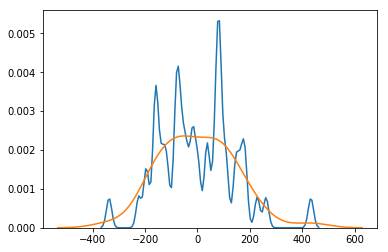

In [30]:
sns.kdeplot(np.array(crime1res1.resid), bw=10)
sns.distplot(np.array(crime1res1.resid), hist=False)

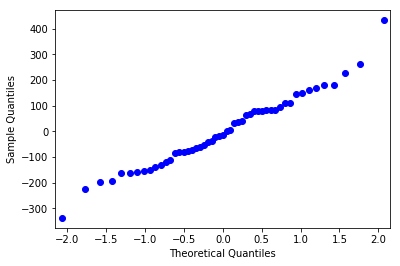

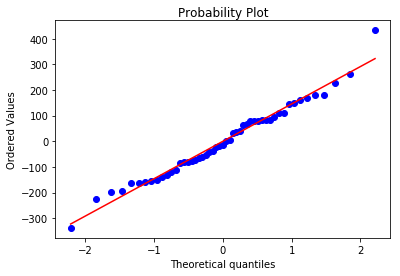

In [31]:
sm.qqplot(crime1res1.resid)
plt.show()

import pylab
scipystats.probplot(crime1res1.resid, dist="norm", plot=pylab)
pylab.show()

In [32]:
'''
by default, scipy stats.kstest for normal will assume mean 0 and stdev 1. To use this, the data should be normalized first
'''
resid1 = crime1res1.resid
norm_resid1 = (crime1res1.resid - np.mean(crime1res1.resid)) / np.std(crime1res1.resid)
print scipystats.kstest(norm_resid1, 'norm')

# or use the statsmodels provided function kstest_normal to use kolmogorov-smirnov test or Anderson-Darling test
print stats.diagnostic.kstest_normal(crime1res1.resid, pvalmethod='approx')
print stats.diagnostic.normal_ad(crime1res1.resid)

KstestResult(statistic=0.06674699029137354, pvalue=0.9769440836293136)
(0.06513952258179745, 0.2)
(0.2872017287878421, 0.6072847135798616)


## almost similar as without murder

# 2.3 Tests for Heteroscedasticity

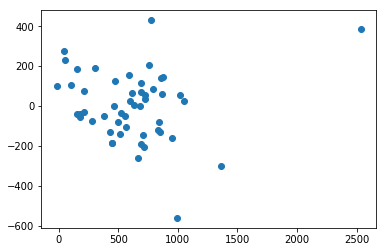

In [39]:
lm = smf.ols(formula = "crime ~ pctmetro + poverty + single + pctwhite  ", data = crime).fit()

resid = lm.resid
plt.scatter(lm.predict(), resid)

In [40]:
# p-value here is different from SAS output, need double check
stats.diagnostic.het_white(resid, lm.model.exog, retres = False)

(33.93947607795313,
 0.0021048448044827133,
 5.115489939519657,
 3.798338454099002e-05)

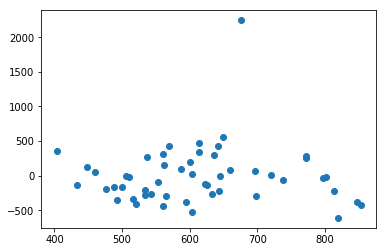

In [41]:
lm2 = smf.ols(formula = "crime ~ pcths", data = crime).fit()

plt.scatter(lm2.predict(), lm2.resid)

In [46]:
crime['log_pcths'] = crime.pcths.map(lambda x: math.log(x))


In [52]:
crime = crime.drop(columns = 'log_enroll')

In [53]:
crime.head()

,sid,state,crime,murder,pctmetro,pctwhite,pcths,poverty,single,log_pcths
0,1,ak,761,9.0,41.8,75.2,86.6,9.1,14.3,4.461300
1,2,al,780,11.6,67.4,73.5,66.9,17.4,11.5,4.203199
2,3,ar,593,10.2,44.7,82.9,66.3,20.0,10.7,4.194190
3,4,az,715,8.6,84.7,88.6,78.7,15.4,12.1,4.365643
4,5,ca,1078,13.1,96.7,79.3,76.2,18.2,12.5,4.333361


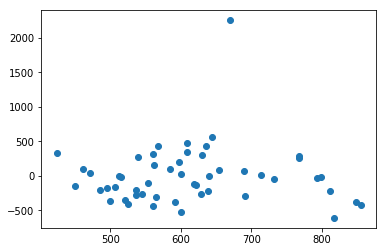

In [54]:
crime['log_pcths'] = crime.pcths.map(lambda x: math.log(x))
lm3 = smf.ols(formula = "crime ~ log_pcths", data = crime).fit()

plt.scatter(lm3.predict(), lm3.resid)

#### Finally, let's revisit the model we used at the start of this section, predicting crime from poverty, single... Using this model, the distribution of the residuals looked very nice and even across the fitted values. What if we add pcths to this model? Will this automatically ruin the distribution of the residuals? Let's add it and see.

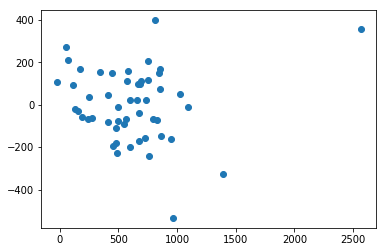

In [56]:
lm4 = smf.ols(formula = "crime ~ pctmetro + poverty + single + pctwhite + pcths ", data = crime).fit()

resid = lm4.resid
plt.scatter(lm4.predict(), resid)

-  As you can see, the distribution of the residuals looks fine, even after we added the variable pcthc. When we had just the variable pcths in the model, we did a log transformation to improve the distribution of the residuals, but when pcthsl was part of a model with other variables, the residuals looked good enough so that no transformation was needed. This illustrates how the distribution of the residuals, not the distribution of the predictor, was the guiding factor in determining whether a transformation was needed.